## Observations and Insights 

The Drug regimen of Capomulin was effective in reducing the tumor volume in a mouse over a 45 day period by 35%. Continuing the study past 45 days could tell us the efficacy of Capomulin.  

Both regimens had the lowest mean, and lowest Standard deviations. With a starting tumor volume of 45, only Capomulin and Ramicane reduced tumor volume after 45 days. Based on final tumor volume both Capomulin and Ramicane appeared to be equally effective.

There is a positive correlation between average tumor volume and weight within the subject mice at 0.84.  But what does that mean?  Correlation does not imply causation.

The study population was 51% / 49% male to female. Further analysis shows that Capomulin's population was 55.7% female and 44.3% male, while Ramicane's population was 67.5% male and 32.5% female.  It would be worth further study to sex correlates to efficacy of these drug regimens.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Load the data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = study_results.merge(mouse_metadata, on = 'Mouse ID')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice in the DataFrame.
mouse_metadata['Mouse ID'].value_counts()

a444    1
u149    1
g867    1
s152    1
n304    1
       ..
k862    1
c458    1
z578    1
y793    1
a685    1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
#merged_df.count()
merged_df['Mouse ID'].value_counts()

g989    13
a251    10
g497    10
w575    10
u364    10
        ..
v199     1
h428     1
x226     1
b447     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
Drug_Regimen = merged_df.groupby(["Drug Regimen"])
Drug_Regimen.head()

Drug_Regimen_mean = Drug_Regimen["Tumor Volume (mm3)"].mean()
Drug_Regimen_median = Drug_Regimen["Tumor Volume (mm3)"].median()
Drug_Regimen_variance = Drug_Regimen["Tumor Volume (mm3)"].var()
Drug_Regimen_std = Drug_Regimen["Tumor Volume (mm3)"].std()
Drug_Regimen_sem = Drug_Regimen["Tumor Volume (mm3)"].sem()

Summary = pd.DataFrame({"Mean":Drug_Regimen_mean, "Median":Drug_Regimen_median, "Variance":Drug_Regimen_variance, "Standard Deviation":Drug_Regimen_std, "SEM":Drug_Regimen_sem})
Summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

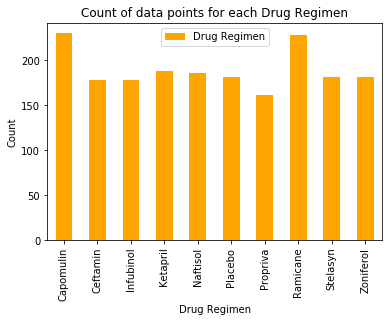

In [5]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

 # First create a dataframe grouping by the 'Drug Regimen' column 
drug_group = merged_df.groupby('Drug Regimen') 
 
# Create a dataframe counting the number of data points for each Drug Regimen 
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count()) 
 
# Create a bar chart based off of the group series from before and label the title 
count_chart = drug_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="orange") 
 
# Set the xlabel and ylabel using class methods 
count_chart.set_xlabel("Drug Regimen") 
count_chart.set_ylabel("Count") 
#plt.tight_layout() 

# Save the figure 
plt.savefig("figures/PandaBarChart.png") 
 
plt.show()

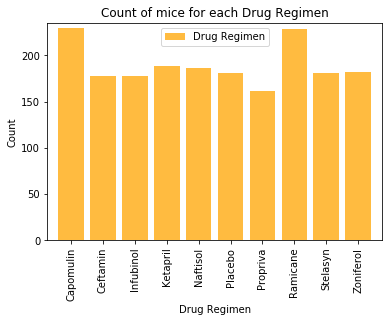

In [6]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(0, len(drug_group_count))
tick_locations = [value for value in x_axis]

plt.title("Count of mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.xlim(-0.75, len(drug_group)-0.25)
plt.ylim(0, max(drug_group_count["Drug Regimen"]) +5)

plt.bar(x_axis,drug_group_count["Drug Regimen"],facecolor='orange',alpha=0.75, align= 'center')
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

column_name = ["Drug Regimen"] 
plt.legend(column_name,loc="best")
plt.savefig("figures/PyplotBarChart.png")
plt.show()

## Pie Plots

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# First create a dataframe grouping by the 'Sex' column 
gender_group = merged_df.groupby('Sex') 
 
# Create a dataframe counting the number of data points for each gender 
gender_group_count = pd.DataFrame(gender_group['Sex'].count()) 
 
# View the groupby dataframe 
gender_group_count

,Sex
Sex,
Female,935
Male,958


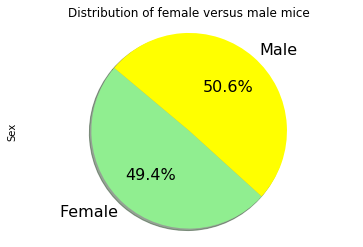

In [8]:
# Create a pie chart based off of the group series from before 
gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightgreen","yellow"],legend =False) 

# Make the axis equal to avoid plotting an egg shaped pie chart 
plt.axis("equal") 
plt.savefig("figures/PandaPieChart.png") 
plt.show()

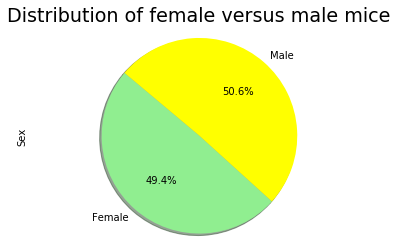

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get Labels for our pie chart from the index values of the groupby dataframe 
genders = list(gender_group_count.index.values) 
 
# The values of each section of the pie chart 
gender_counts = gender_group_count['Sex'] 
 
# The colors of each section of the pie chart 
colors = ["lightgreen", "yellow"] 
 
# Creates the pie chart based upon the values above # Automatically finds the percentages of each part of the pie chart 
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16 
plt.title("Distribution of female versus male mice") 
plt.ylabel("Sex") 
plt.axis("equal") 
plt.savefig("figures/PyplotPieChart.png") 
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# For final analysis, determined starting tumor volume size
merged_timepoint_df = merged_df.sort_values("Timepoint", ascending = True)
merged_timepoint_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1460,w584,0,45.0,0,Infubinol,Male,3,29
1006,p136,0,45.0,0,Zoniferol,Female,5,28
461,a411,0,45.0,0,Ramicane,Male,3,22
1467,b447,0,45.0,0,Ceftamin,Male,2,30


In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#quartiles = drug_group.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

# Grab just data for the Capomulin regimen
Capomulin_regimenData = merged_df[(merged_df["Drug Regimen"] == "Capomulin")]

# Sort by Timepoints based on the latest values
Capomulin_regimenData = Capomulin_regimenData.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse 
Capomulin_Timepoint_df = Capomulin_regimenData.drop_duplicates(subset="Mouse ID", keep = 'first')

# Reporting out just Tumor Volume
Capomulin_regimenPlot = Capomulin_Timepoint_df["Tumor Volume (mm3)"]


# quartile calculations
Capomulin_quartiles = Capomulin_regimenPlot.quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq

print(f"The lower quartile of Tumor volume (mm3) is: {Capomulin_lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {Capomulin_upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {Capomulin_iqr}")
print(f"The the median of Tumor Volume (mm3) is: {Capomulin_quartiles[0.5]} ")

Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)
print(f"Values below {Capomulin_lower_bound} could be outliers.")
print(f"Values above {Capomulin_upper_bound} could be outliers.")

The lower quartile of Tumor volume (mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3) is: 7.781863460000004
The the median of Tumor Volume (mm3) is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


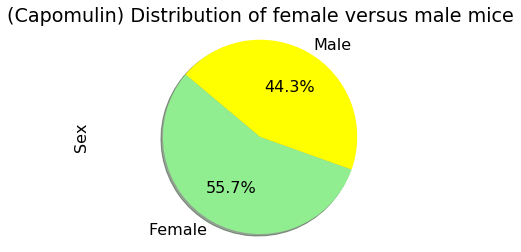

In [13]:
# For final data analysis, determine population mix
Cap_gender_group = Capomulin_regimenData.groupby('Sex') 
Cap_gender_group_count = pd.DataFrame(Cap_gender_group['Sex'].count())  
Cap_gender_group_count 
Cap_gender_group_count.plot(kind='pie', y='Sex', \
                        title="(Capomulin) Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightgreen","yellow"],legend =False) 
plt.axis("equal") 
plt.savefig("figures/CapomulinPieChart.png") 
plt.show()

In [14]:
# Grab just data for the Ramicane regimen
Ramicane_regimenData = merged_df[(merged_df["Drug Regimen"] == "Ramicane")]

# Sort by Timepoints based on the latest values
Ramicane_regimenData = Ramicane_regimenData.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
Ramicane_Timepoint_df = Ramicane_regimenData.drop_duplicates(subset="Mouse ID", keep = 'first')

# Reporting out just Tumor Volume
Ramicane_regimenPlot = Ramicane_Timepoint_df["Tumor Volume (mm3)"]


# quartile calculations
Ramicane_quartiles = Ramicane_regimenPlot.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq

print(f"The lower quartile of Tumor volume (mm3) is: {Ramicane_lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {Ramicane_upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {Ramicane_iqr}")
print(f"The the median of Tumor Volume (mm3) is: {Ramicane_quartiles[0.5]} ")

Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)
print(f"Values below {Ramicane_lower_bound} could be outliers.")
print(f"Values above {Ramicane_upper_bound} could be outliers.")

The lower quartile of Tumor volume (mm3) is: 31.56046955
The upper quartile of Tumor Volume (mm3) is: 40.65900627
The interquartile range of Tumor Volume (mm3) is: 9.098536719999998
The the median of Tumor Volume (mm3) is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


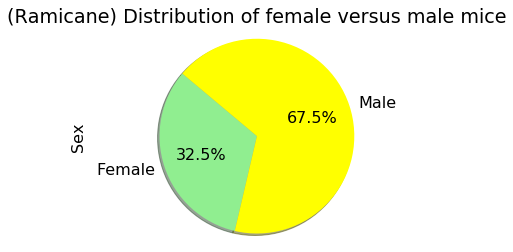

In [15]:
# For final data analysis, determine population mix
Ram_gender_group = Ramicane_regimenData.groupby('Sex') 
Ram_gender_group_count = pd.DataFrame(Ram_gender_group['Sex'].count())  
Ram_gender_group_count 
Ram_gender_group_count.plot(kind='pie', y='Sex', \
                        title="(Ramicane) Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightgreen","yellow"],legend =False) 
plt.axis("equal") 
plt.savefig("figures/RamicanePieChart.png") 
plt.show()

In [16]:
# Grab just data for the Infubinol regimem
Infubinol_regimenData = merged_df[(merged_df["Drug Regimen"] == "Infubinol")]

# Sort by Timepoints based on the latest values
Infubinol_regimenData = Infubinol_regimenData.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
Infubinol_Timepoint_df = Infubinol_regimenData.drop_duplicates(subset="Mouse ID", keep = 'first')

# Reporting out just Tumor Volume
Infubinol_regimenPlot = Infubinol_Timepoint_df["Tumor Volume (mm3)"]

# quartile calculations
Infubinol_quartiles = Infubinol_regimenPlot.quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq

print(f"The lower quartile of Tumor volume (mm3) is: {Infubinol_lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {Infubinol_upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {Infubinol_iqr}")
print(f"The the median of Tumor Volume (mm3) is: {Infubinol_quartiles[0.5]} ")

Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)
print(f"Values below {Infubinol_lower_bound} could be outliers.")
print(f"Values above {Infubinol_upper_bound} could be outliers.")

The lower quartile of Tumor volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003
The the median of Tumor Volume (mm3) is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [17]:
# Grab just data for the Capomulin regimen
Ceftamin_regimenData = merged_df[(merged_df["Drug Regimen"] == "Ceftamin")]

# Sort by Timepoints based on the latest values
Ceftamin_regimenData = Ceftamin_regimenData.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
Ceftamin_Timepoint_df = Ceftamin_regimenData.drop_duplicates(subset="Mouse ID", keep = 'first')

# Reporting out just Tumor Volume
Ceftamin_regimenPlot = Ceftamin_Timepoint_df["Tumor Volume (mm3)"]

# quartile calculations
Ceftamin_quartiles = Ceftamin_regimenPlot.quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq

print(f"The lower quartile of Tumor volume (mm3) is: {Ceftamin_lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {Ceftamin_upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {Ceftamin_iqr}")
print(f"The the median of Tumor Volume (mm3) is: {Ceftamin_quartiles[0.5]} ")

Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)
print(f"Values below {Ceftamin_lower_bound} could be outliers.")
print(f"Values above {Ceftamin_upper_bound} could be outliers.")

The lower quartile of Tumor volume (mm3) is: 48.72207785
The upper quartile of Tumor Volume (mm3) is: 64.29983003
The interquartile range of Tumor Volume (mm3) is: 15.577752179999997
The the median of Tumor Volume (mm3) is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


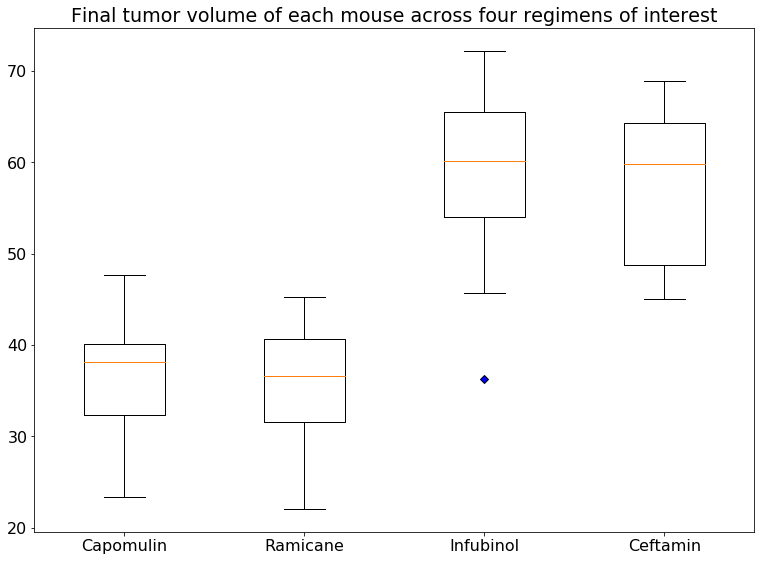

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [Capomulin_regimenPlot, Ramicane_regimenPlot, Infubinol_regimenPlot,Ceftamin_regimenPlot] 
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_title('Final tumor volume of each mouse across four regimens of interest')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

#change coloar and style of outliers
blue_diamond = dict(markerfacecolor='b', marker='D')

# Creating plot 
bp = ax.boxplot(data,flierprops=blue_diamond) 

plt.savefig("figures/PyplotBoxPlot.png")  

# show plot 
plt.show() 

## Line and Scatter Plots

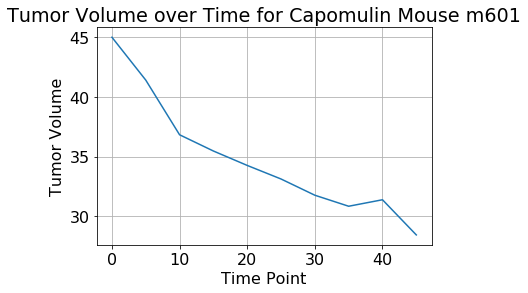

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter original data for just the Capomulin Drug Regime and single mouse
Capomulin_df = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin"),:]
single_mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] =="m601",:]

# Set variables to hold relevant data
timepoint = single_mouse_df["Timepoint"]
tumor_volume = single_mouse_df["Tumor Volume (mm3)"]

# Plot the tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Show the chart, add labels
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mouse m601')
plt.grid(True)
plt.savefig("figures/PyplotLinePlot.png")
plt.show()

<Figure size 432x288 with 0 Axes>

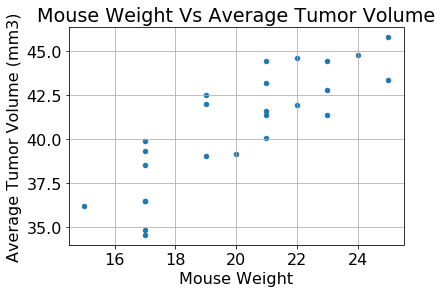

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatterData = merged_df[(merged_df["Drug Regimen"] == "Capomulin")]
scatterData = scatterData[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
groupByData = scatterData.groupby(["Mouse ID","Weight (g)"])
scatterDataDF = groupByData["Tumor Volume (mm3)"].mean()#.to_frame()
scatterDataDF = scatterDataDF.reset_index()

plt.figure()
scatterDataDF.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")

plt.title("Mouse Weight Vs Average Tumor Volume")
#plt.xlim(10, 25)
#plt.ylim(30, 50)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.savefig("figures/PyplotScatterPlot.png")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


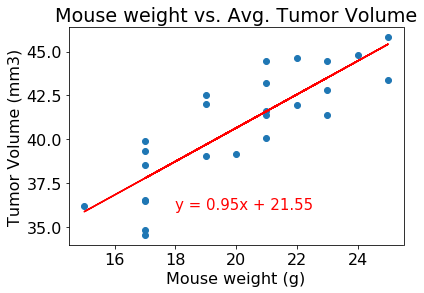

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatterDataDF["Weight (g)"],scatterDataDF["Tumor Volume (mm3)"]) 

x_values = scatterDataDF["Weight (g)"]
y_values = scatterDataDF["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")

plt.title('Mouse weight vs. Avg. Tumor Volume')
plt.xlabel('Mouse weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig("figures/PyplotLinearReg.png")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()